In [1]:
# Auto loading
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import scipy.special
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [3]:
from utils import to_radian,res_to_rad,ax_to_w,rep_to_angle
from rotation_3d import trilinear_interp,get_target_Y_1d,tricubic_interp,tricubic_derivatives,tricubic_interp_1d,X_inv,rotate_coords_3d
from visualize import plot_cost_func,plot_volume
from cost_functions import cf_ssd
from Gauss_Newton import Gauss_Newton, axis_derivatives,print_results,sphere_mask,get_nonzero_mask,fourier_filter,get_gradient_P, window,get_mask_weights
from conversion import angles_from_q

In [4]:
oct13_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_10.p','rb'))
oct13_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_8.p','rb'))
oct13_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_6_4.p','rb'))

In [5]:
# Get All Axes of Rotations
path = '/Users/zyzdiana/Dropbox/THESIS/Sept_23_navs/'
ranges = ['0_5_to_2_5','3_0_to_5_0']
files = os.listdir(path)
axes_dict = {}
for f in files[1:]:
    rot_ax = f.split('_')[2]
    trans_ax = f.split('_')[10]
    if not axes_dict.has_key(rot_ax):
        axes_dict[rot_ax] = trans_ax
print axes_dict
print axes_dict.keys()

{'xz': 'xy', 'y': 'z', 'yz': 'xy', 'xy': 'xy', 'x': 'z', 'z': 'z'}
['xz', 'y', 'yz', 'xy', 'x', 'z']


In [52]:
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

#testVol1 = fourier_filter(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
#testVol2 = fourier_filter(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)

testVol1 = oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)]

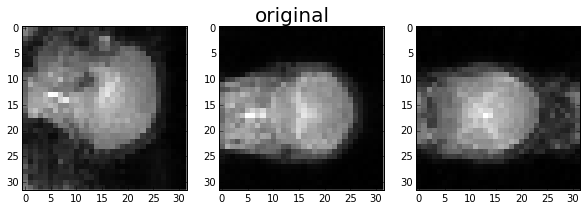

In [53]:
plot_volume(testVol1,"original")
testVol1.tofile("original.dat", sep='\n', format = "%e")

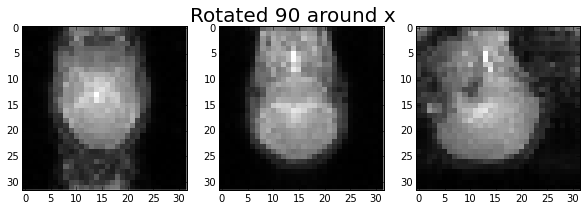

In [55]:
from rotation_3d import volrotate_trilinear
wx, wy, wz = 1,0,0
rotx = volrotate_trilinear(testVol1, 90, wx, wy, wz)
plot_volume(rotx,'Rotated 90 around x')
rotx.tofile("rot90_x.dat", sep='\n', format = "%e")

In [67]:
rotz[:,0,0]

array([  8.12677783e-04,   5.48947894e-04,   4.34707064e-04,
         8.91312142e-04,   2.75425758e-04,   2.37784334e-04,
         8.69027455e-04,   1.78974005e-04,   4.05808707e-04,
         1.25849867e-04,   5.94947720e-04,   3.97454307e-04,
         7.89358863e-04,   6.45420630e-04,   3.14550358e-04,
         8.89345712e-04,   1.34674984e-03,   7.68416969e-04,
         6.95447729e-04,   8.01804184e-04,   9.49271198e-04,
         1.08700211e-03,   9.01034364e-05,   2.58186366e-04,
         1.36165100e-03,   3.74328112e-04,   1.04203064e-03,
         1.37462083e-03,   1.71407184e-03,   7.87174286e-05,
         5.14346932e-04,   9.29203641e-04])

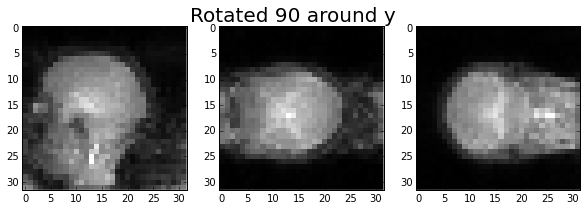

In [56]:
wx, wy, wz = 0,1,0
roty = volrotate_trilinear(testVol1, 90, wx, wy, wz)
plot_volume(roty,'Rotated 90 around y')
roty.tofile("rot90_y.dat", sep='\n', format = "%e")

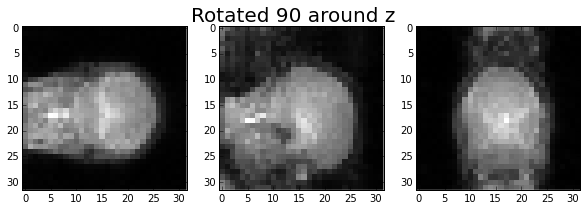

In [57]:
wx, wy, wz = 0,0,1
rotz = volrotate_trilinear(testVol1, 90, wx, wy, wz)
plot_volume(rotz,'Rotated 90 around z')
rotz.tofile("rot90_z.dat", sep='\n', format = "%e")

In [ ]:
testVol1.tofile("testVol1.dat", sep='\n', format = "%e")
testVol1.tofile("testVol2.dat", sep='\n', format = "%e")

In [7]:
vol1_dervs = tricubic_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

In [11]:
print trilinear_interp(testVol1,-0.5,-1.5,2.5)
print get_target_Y_1d(1,2,3)
print tricubic_interp_1d(testVol2.shape,vol2_dervs,0.5,1.5,2.5)

0.00118866303905
0.00065559775491
[[   1.    1.    1.    1.    2.    2.    2.    2.    4.    4.    4.    4.
     8.    8.    8.    8.    3.    3.    3.    3.    6.    6.    6.    6.
    12.   12.   12.   12.   24.   24.   24.   24.    9.    9.    9.    9.
    18.   18.   18.   18.   36.   36.   36.   36.   72.   72.   72.   72.
    27.   27.   27.   27.   54.   54.   54.   54.  108.  108.  108.  108.
   216.  216.  216.  216.]]


In [12]:
x, y, z = 10,14,18
wx, wy, wz = 0,0,1
ox,oy,oz = 15.5,15.5,15.5
rotate_coords_3d(x, y, z, 15, wx, wy, wz, ox,oy,oz)

(10.575636523063906, 12.627606512502533, 18.0)

In [ ]:
path = '/Users/zyzdiana/GitHub/AC297r-Volume-Registration/C++/'
file_name = 'vol2_derivs.dat'
shape  = vol2_dervs.shape
res = np.array(np.memmap(path+file_name, dtype=np.float32, mode='c', shape=shape))